In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("wines_properties.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Alcohol                 178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Ash_Alcanity            178 non-null float64
Magnesium               178 non-null int64
Total_Phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid_Phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_Intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
Customer_Segment        178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [4]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


## 1) Principal Component Analysis and Circle of Correlations

### Separate features and target

In [20]:
features = df.columns[:-1]

In [21]:
target = df.columns[-1]

In [25]:
x = df.loc[:, features].values
y = df.loc[:, target].values

### Standardization of the features

In [27]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(x)

### PCA Projection to 2 Dimensions

In [28]:
from sklearn.decomposition import PCA

In [29]:
my_pca = PCA(n_components=2)

In [30]:
principal_components = my_pca.fit_transform(x)

In [31]:
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

In [41]:
principal_df.head()

,Principal Component 1,Principal Component 2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


In [67]:
PCs = my_pca.components_ #Loadings of the two Principal Components

In [36]:
PCs

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283]])

In [39]:
PCs.shape[0]

2

### Circle of Correlations Visualization

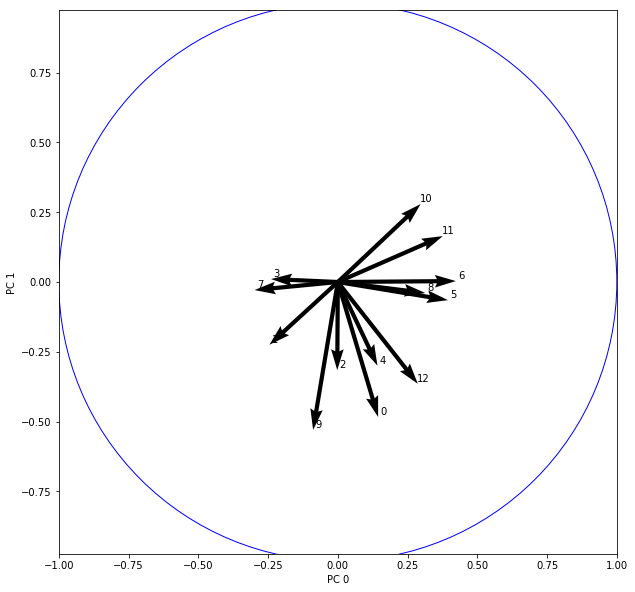

In [69]:
# Use quiver to generate the basic plot
fig = plt.figure(figsize=(10,10))
plt.quiver(np.zeros(PCs.shape[1]), np.zeros(PCs.shape[1]),
           PCs[0,:], PCs[1,:], 
           angles='xy', scale_units='xy', scale=1)

# Add labels based on feature names (here just numbers)
feature_names = np.arange(PCs.shape[1])
for i,j,z in zip(PCs[1,:]+0.02, PCs[0,:]+0.02, feature_names):
    plt.text(j, i, z, ha='center', va='center')

# Add unit circle
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

# Ensure correct aspect ratio and axis limits
plt.axis('equal')
plt.xlim([-1.0,1.0])
plt.ylim([-1.0,1.0])

# Label axes
plt.xlabel('PC 0')
plt.ylabel('PC 1')

# Done
plt.show()

## 2) Hierarchical Clustering

In [45]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [56]:
linked = linkage(x, method='complete', metric='euclidean')

In [57]:
labelList = range(1, 179)

In [58]:
linked[0:5]

array([[  9.        ,  47.        ,   1.16411367,   2.        ],
       [131.        , 133.        ,   1.19160238,   2.        ],
       [ 11.        ,  12.        ,   1.20935571,   2.        ],
       [ 15.        ,  53.        ,   1.22551046,   2.        ],
       [ 92.        , 107.        ,   1.24538798,   2.        ]])

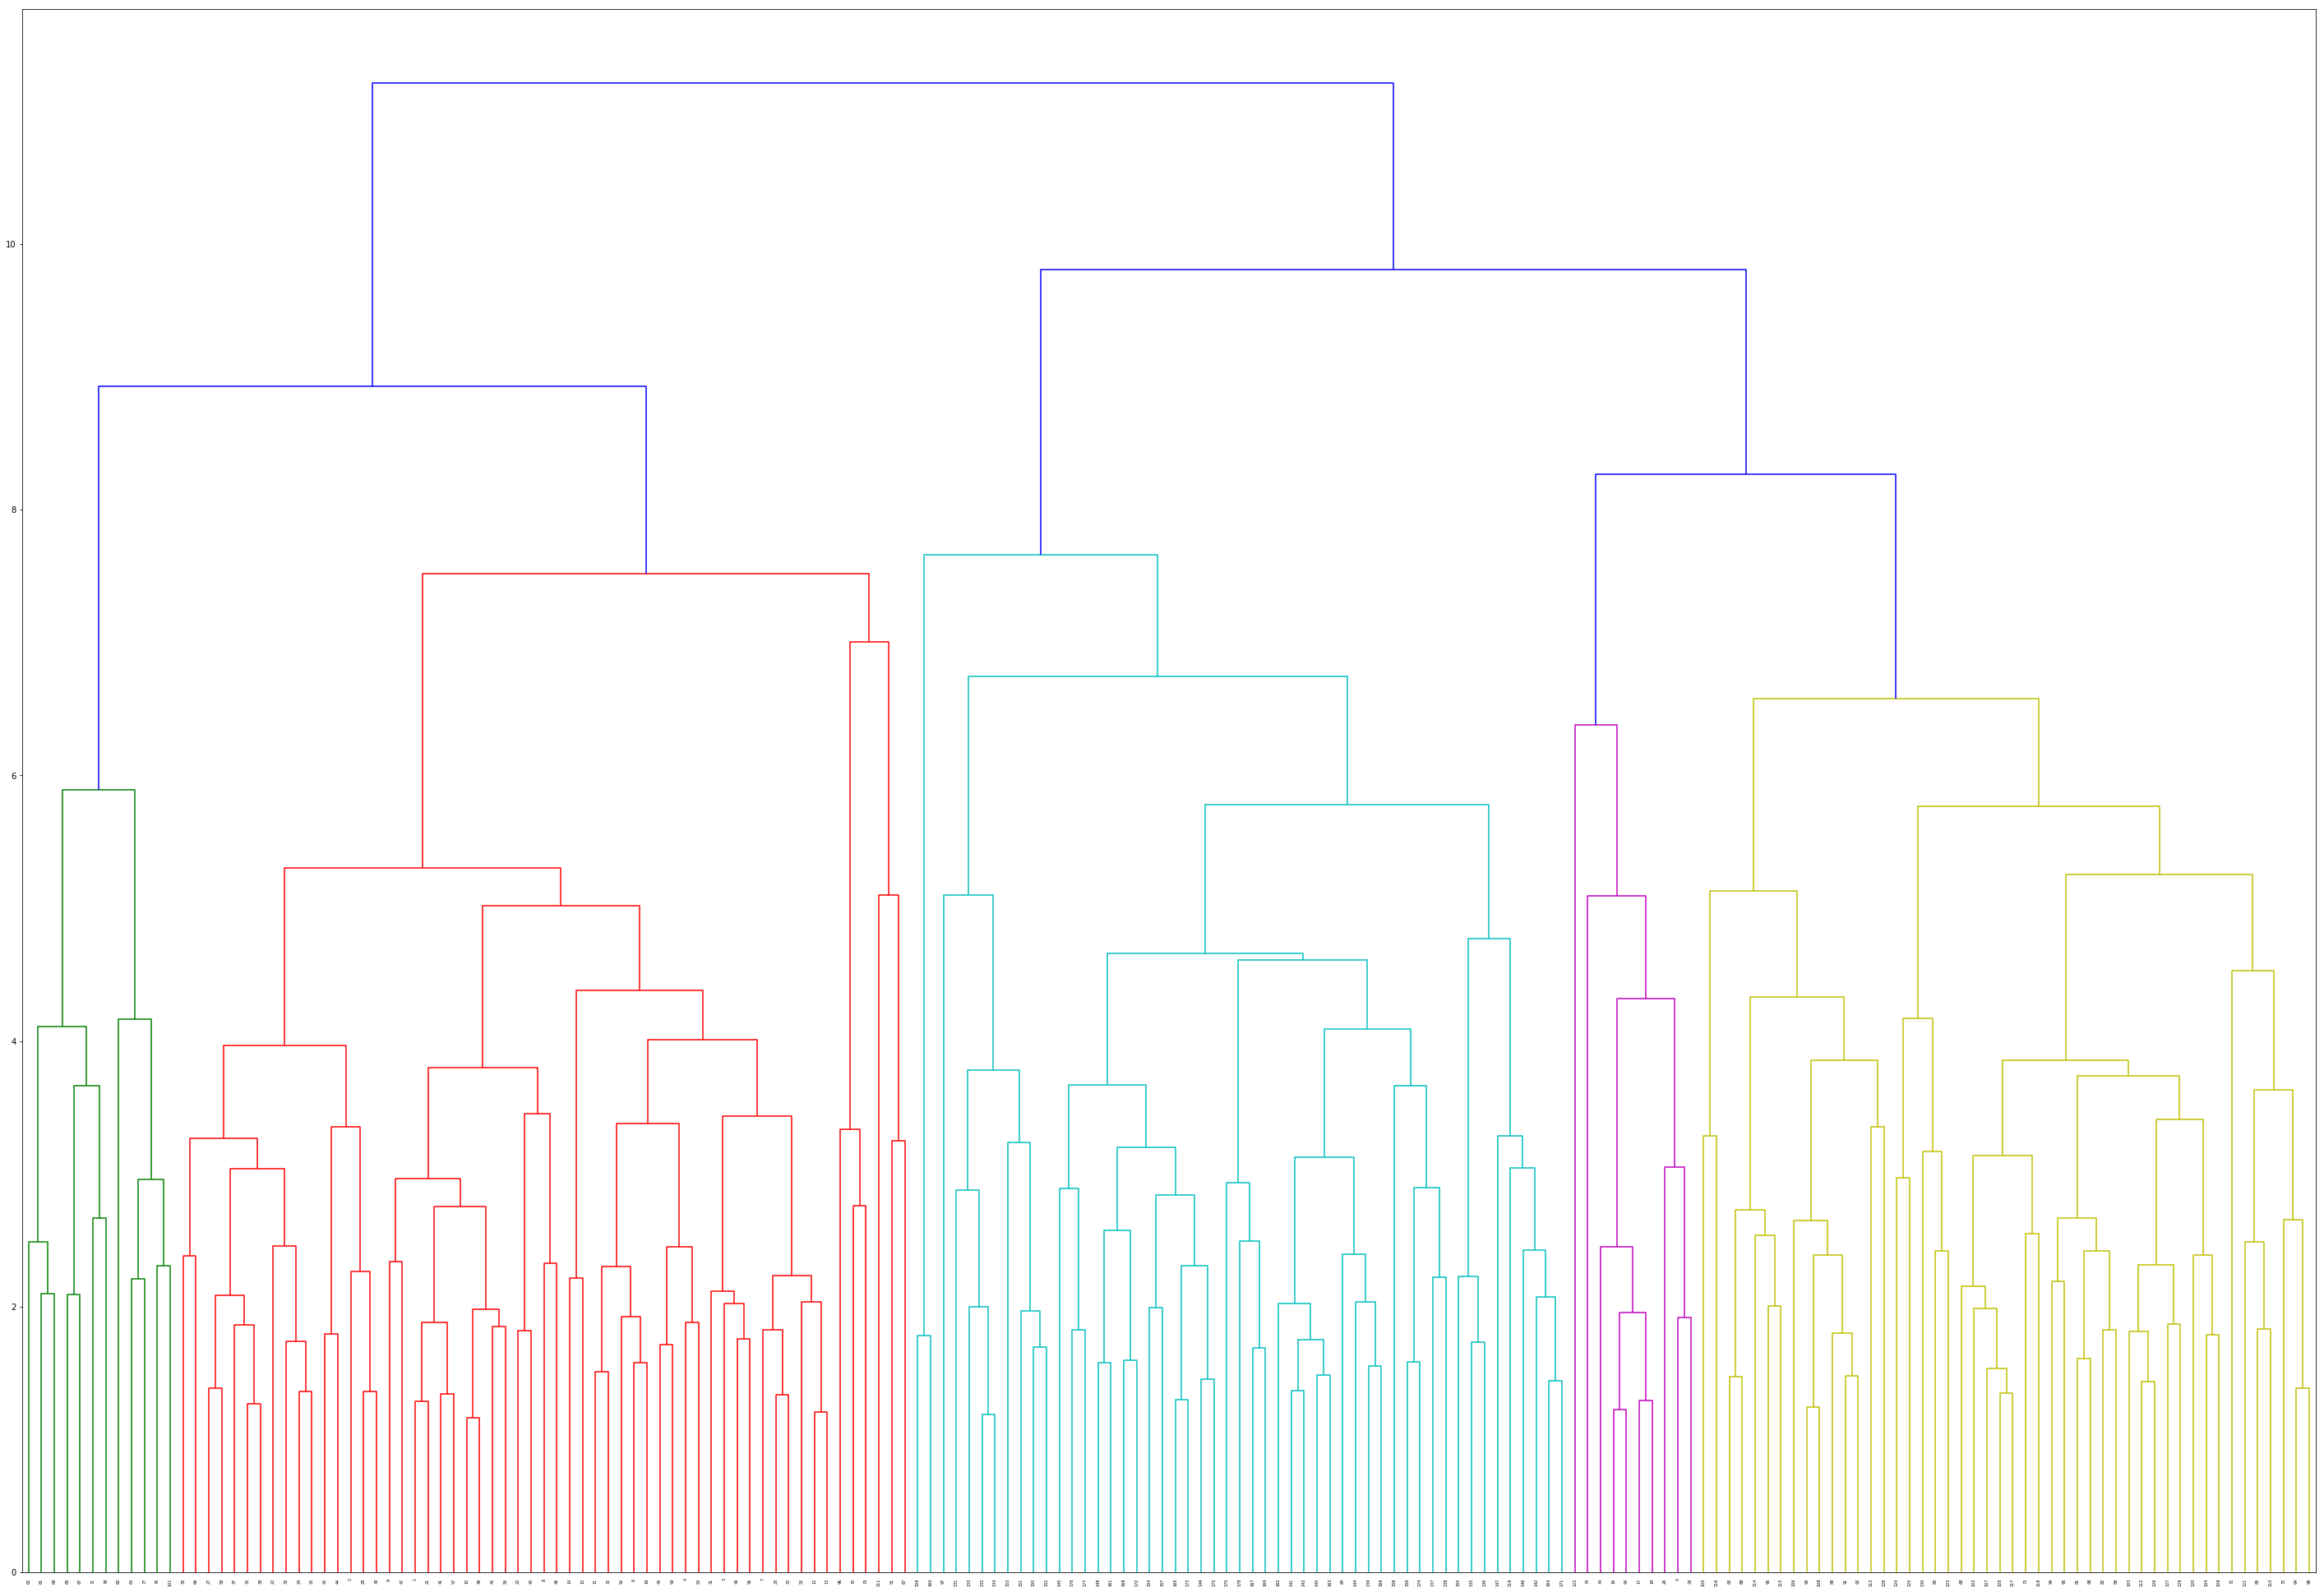

In [59]:
plt.figure(figsize=(50,35))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show() 

### Selecting the number of Clusters

The similarity of two observations is based on the location on the vertical axis where branches containing the two observations first are fused together. 
Based on the dendrogram above we can conclude that most likely there are 3 - 5 clusters present in the data. With other clustering algorithms like the K-Means we can validate the number of clusters which is most likely.

## 3) K-Means Clustering Algorithm

In [63]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(x)

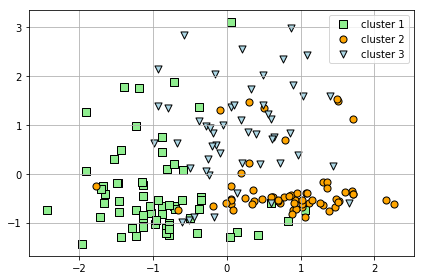

In [85]:
# cluster 1
plt.scatter(x[y_km == 0, 0],
            x[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1')
# cluster 2
plt.scatter(x[y_km == 1, 0],
            x[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2')
# cluster 3
plt.scatter(x[y_km == 2, 0],
            x[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='cluster 3')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

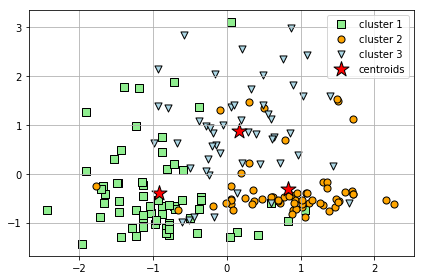

In [64]:
# cluster 1
plt.scatter(x[y_km == 0, 0],
            x[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1')
# cluster 2
plt.scatter(x[y_km == 1, 0],
            x[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2')
# cluster 3
plt.scatter(x[y_km == 2, 0],
            x[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='cluster 3')
# centroids 
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

### Silhouette Analysis

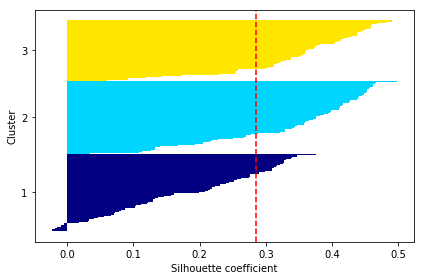

In [70]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(x, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

### Clusters plotted on the first two dimensions of the PCA

Text(0, 0.5, 'Principal Component 1')

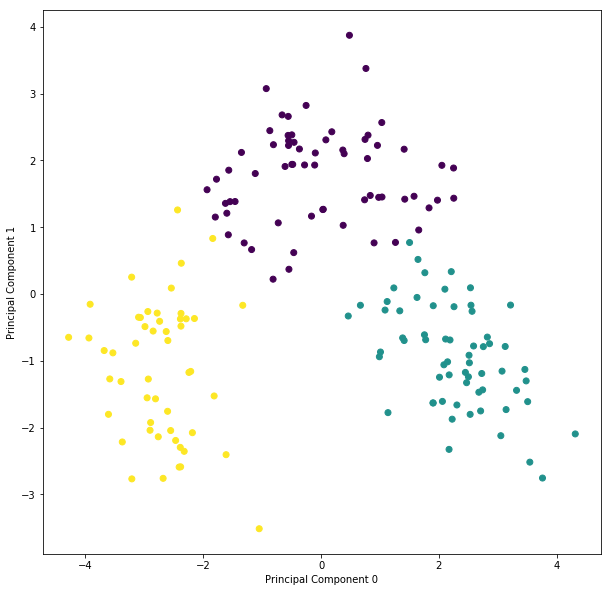

In [77]:
plt.figure(figsize=[10,10])
plt.scatter(principal_df['Principal Component 1'], principal_df['Principal Component 2'], c=y_km)
plt.xlabel('Principal Component 0')
plt.ylabel('Principal Component 1')

### Barycenters of the Clusters

In [78]:
km_pca = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km_pca = km_pca.fit_predict(principal_df)

Text(0, 0.5, 'Principal Component 1')

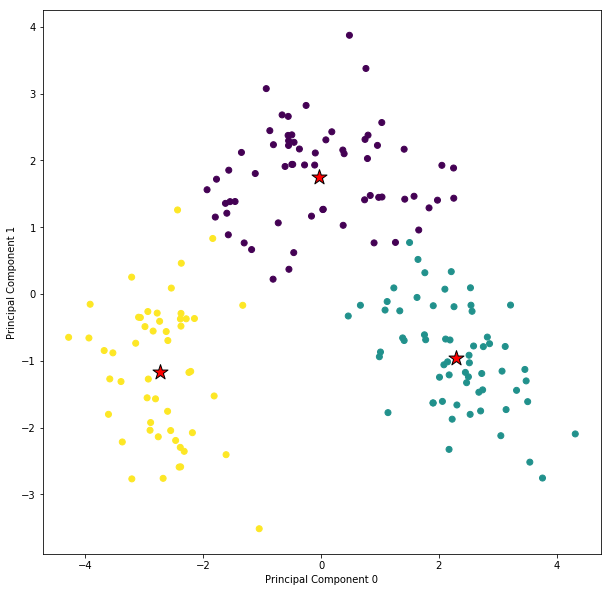

In [84]:
plt.figure(figsize=[10,10])
plt.scatter(principal_df['Principal Component 1'], principal_df['Principal Component 2'], c=y_km)
plt.scatter(km_pca.cluster_centers_[:, 0],
            km_pca.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.xlabel('Principal Component 0')
plt.ylabel('Principal Component 1')